In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and convert into dataframe
data = pd.read_csv('/loan_prediction.csv')
# Looking first five rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# display Maximum rows
pd.set_option('display.max.rows',None)

In [4]:
# Checking  total number columns and rows
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Checking shape of dataset
data.shape

(614, 13)

In [6]:
# we see that dataset have 614 rows and 13 columns

In [7]:
#removing duplicate values
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(614, 13)

In [9]:
# we see that there is no duplicate values

In [10]:
#Checking the datatype of each variables
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
###### Identifing the type of Problem- Output: Loan_Status.

#As per problem statement label variable i.e. Loan_Status is object  value so we'll use classification to learn our model.

In [12]:
# Checking Null values of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [13]:
# Checking missing values of each attributes
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

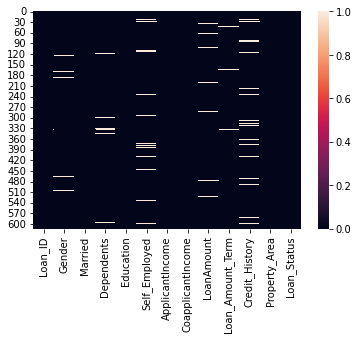

In [14]:
#Looking for null values if any, in heatmap
sns.heatmap(data.isna())
plt.show()

In [15]:
# we see that missing value present in dataset
#Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

In [16]:
#Checking Statistics summary of dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
#The mean is more than median for ApplicantIncome, CoapplicantIncome and LoanAmount.
#There is large difference between standard deviation and maximum for ApplicantIncome and CoapplicantIncome.

In [18]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

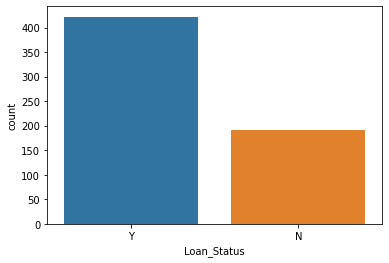

In [19]:
sns.countplot(data['Loan_Status'])
plt.show()

In [20]:
#Loan application  have more approval than rejected in the datset

In [21]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

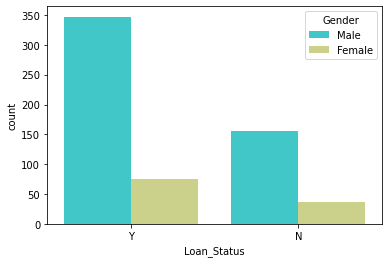

In [23]:
sns.countplot(x='Loan_Status',hue='Gender',data=data,palette='rainbow')
plt.show()

In [24]:
#Loan of male applicants have more approved than female applicants

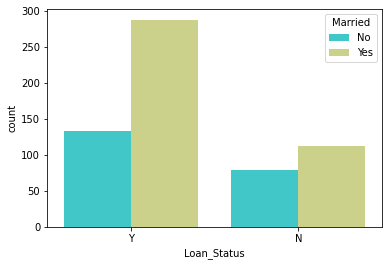

In [25]:
sns.countplot(x=data['Loan_Status'],hue=data['Married'],palette='rainbow')
plt.show()

In [26]:
#Loan of married applicants have more approved than unmarried applicants

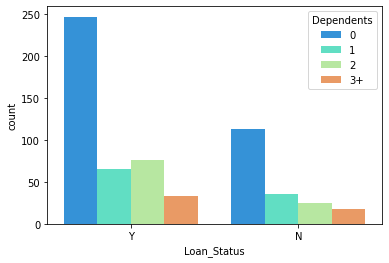

In [27]:
sns.countplot(x=data['Loan_Status'],hue=data['Dependents'],palette='rainbow')
plt.show()

In [28]:
#Loan of the applicants who have 0 dependents under them have approved the most.

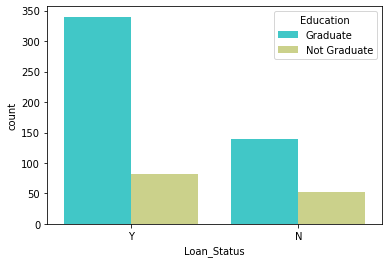

In [29]:
sns.countplot(x=data['Loan_Status'],hue=data['Education'],palette='rainbow')
plt.show()

In [30]:
#Loan of graduated applicants have more approved than notgraduated applicants

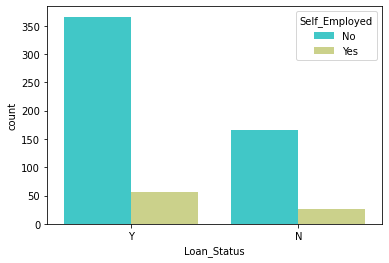

In [31]:
sns.countplot(x=data['Loan_Status'],hue=data['Self_Employed'],palette='rainbow')
plt.show()

In [32]:
#Loan of self employed applicants have more rejected than approved in the dataset.

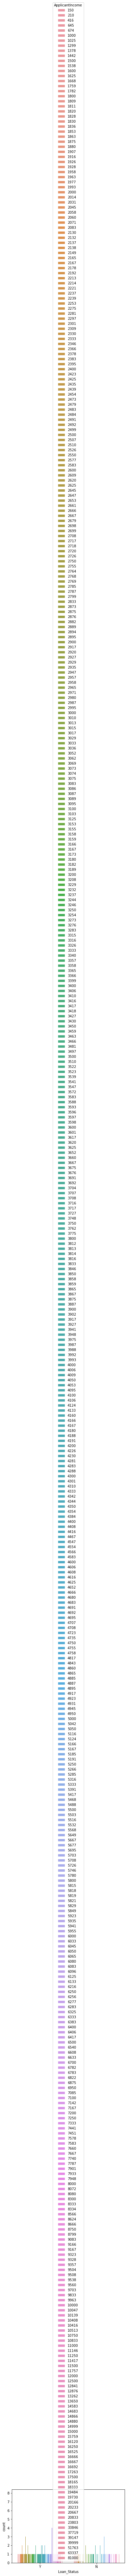

In [33]:
sns.countplot(x=data['Loan_Status'],hue=data['ApplicantIncome'])
plt.show()

In [34]:
# ApplicantIncome for loan approved and rejected are same

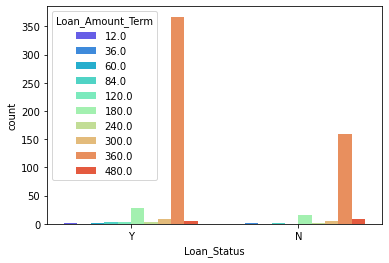

In [35]:
sns.countplot(data['Loan_Status'],hue=data['Loan_Amount_Term'],palette='rainbow')
plt.show()

In [36]:
#Maximum applicants with 360 Loan_Amount_Term

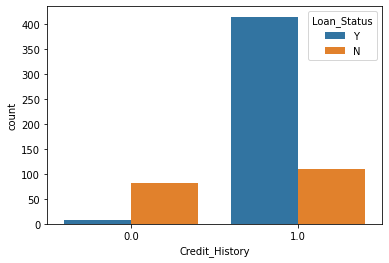

In [37]:
sns.countplot(x = data ['Credit_History'], hue= data['Loan_Status'])
plt.show()

In [38]:
#There is maximum applicants whose credit_History is 1 where maximum rate of loan getting aproved. And aplicants belongs to credit_History 0, having high possibility of loan not getting aproval

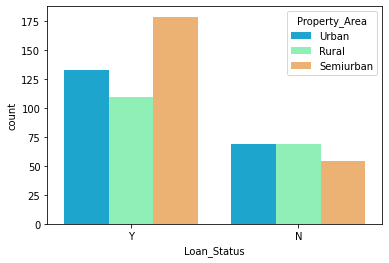

In [39]:
sns.countplot(data['Loan_Status'],hue=data['Property_Area'],palette='rainbow')
plt.show()

In [40]:
#Loan of semiurban applicants have accepted the most in the dataset.

In [41]:
# now we seperate object datatype
data_string_type=[]
for i in data.columns:
    if data[i].dtypes == "object":
        data_string_type.append(i)

In [42]:
# Now we convert object into numerical 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in data_string_type:
    data[columns]=le.fit_transform(data[columns])

In [43]:
correlation = data.corr()
correlation

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549


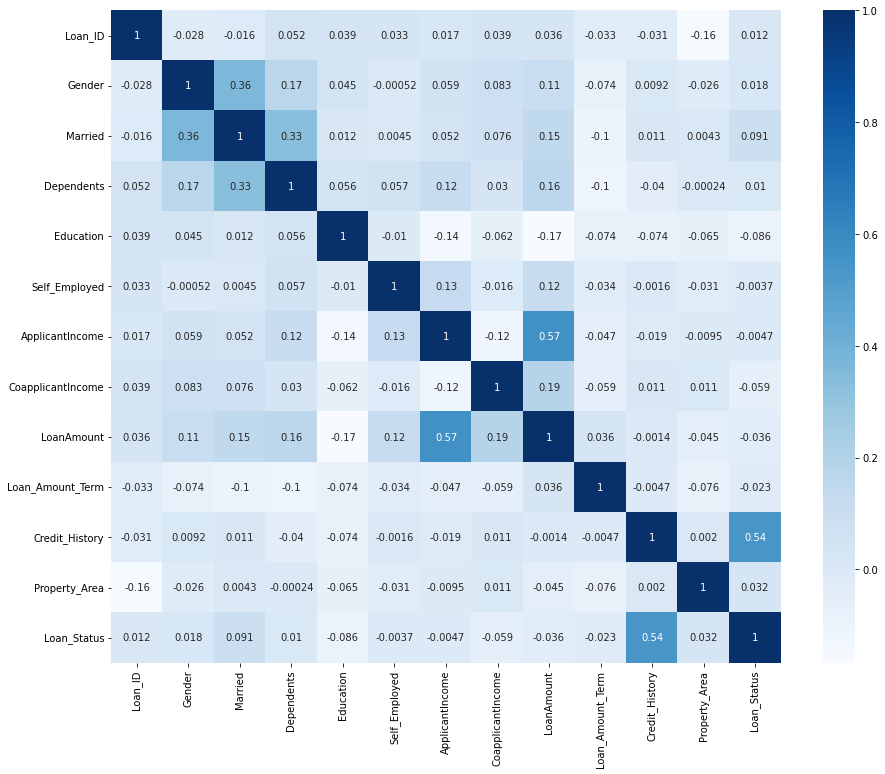

In [44]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation,cmap='Blues',annot=True)
plt.show()

In [45]:
#Education of applicants is highly positively correlated to the dependents.
#Education of applicants is highly negatively correlated to the status of loan.

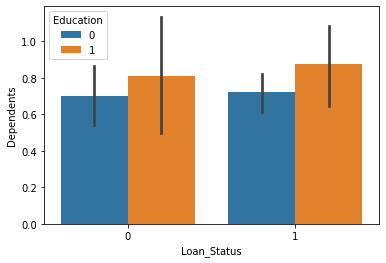

In [46]:
sns.barplot(y = data['Dependents'],hue=data['Education'],x=data['Loan_Status'])
plt.show()

In [47]:
# uneducated person also depend on loan

In [48]:
#Dependents and Education has linear relationship

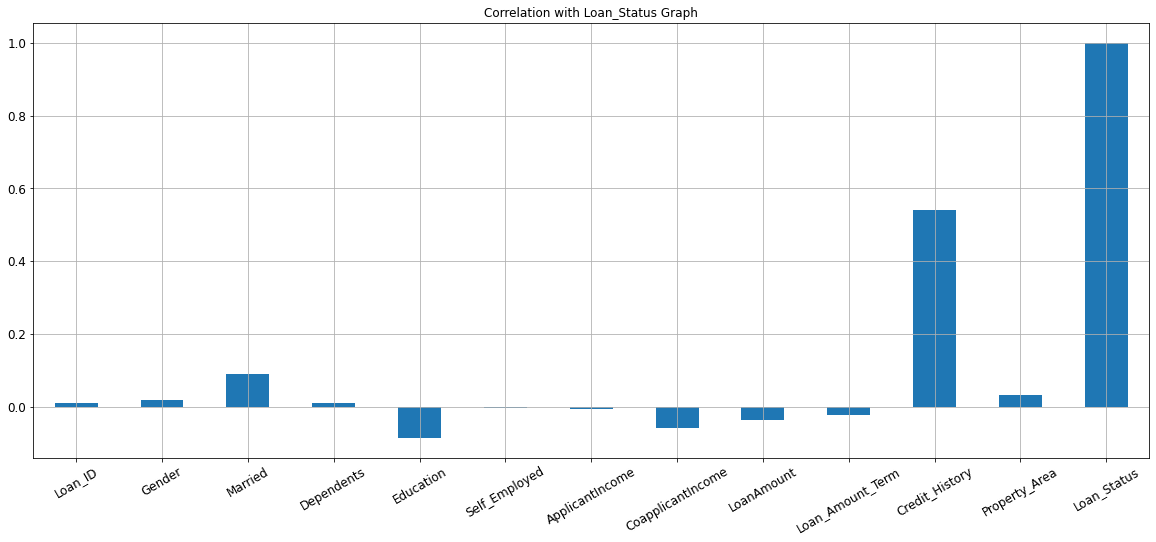

In [49]:
data.corrwith(data.Loan_Status).plot.bar(
        figsize = (20, 8), title = "Correlation with Loan_Status Graph", fontsize = 12,rot = 30, grid = True)
plt.show()

In [50]:
#Loan Status is highly positively correlated to the credit history of applicants

# Loan status has least relation of married and gender

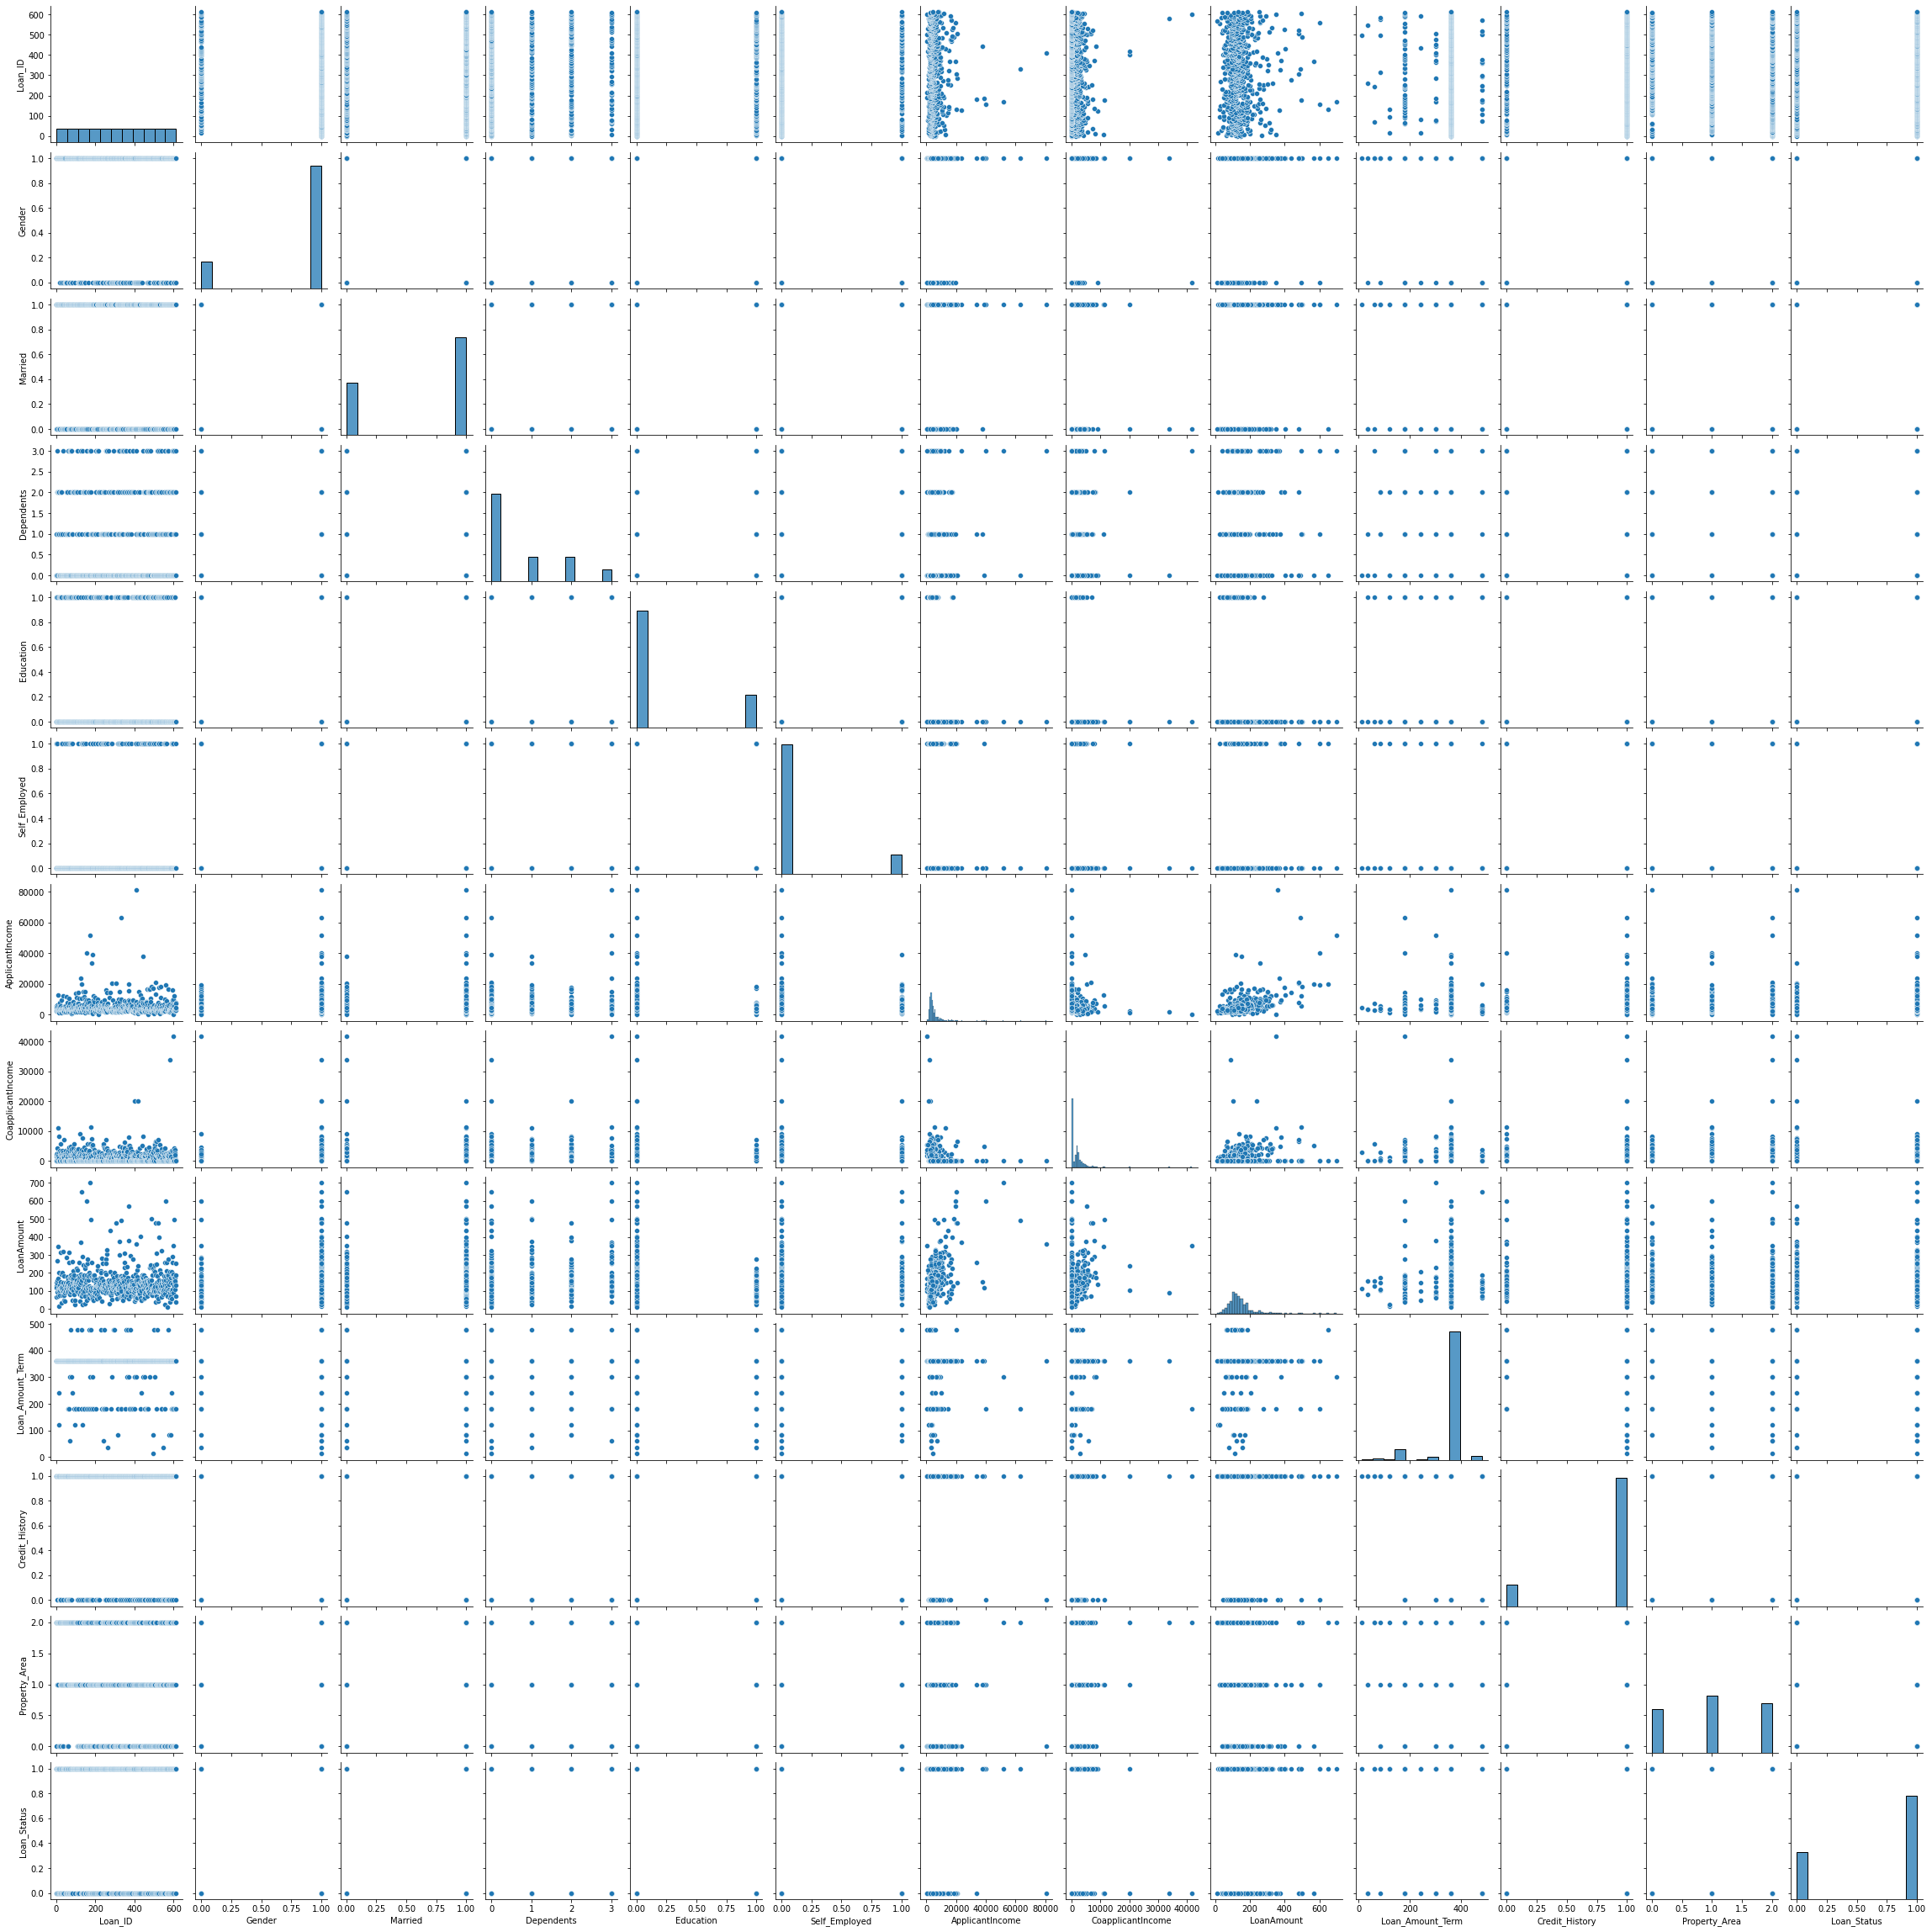

In [51]:
#Drawing Pairplot
sns.pairplot(data)
plt.show()

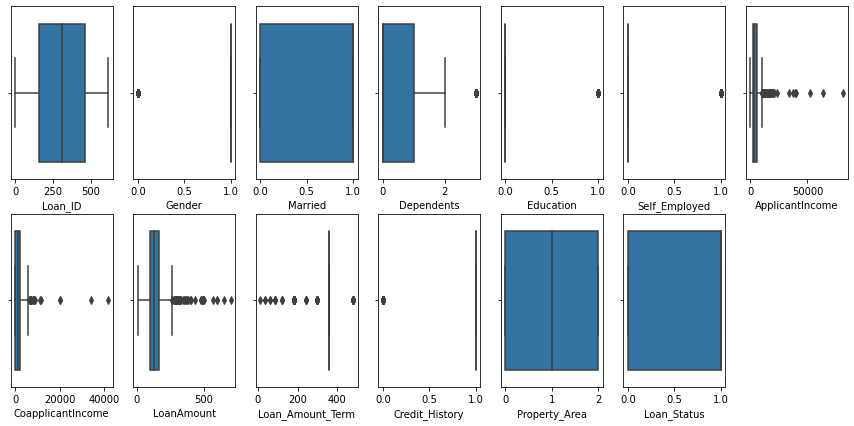

In [52]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,7), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=13 :     # as there are 13 columns in the data
        ax = plt.subplot(2,7,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [53]:
# we see that outlier present in dataset

In [54]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [55]:
from scipy.stats import zscore
z=np.abs(zscore(data))
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8]))


In [56]:
threshold=3
new_data=data[(z<3).all(axis=1)]
print(data.shape)
print(new_data.shape)

(614, 13)
(577, 13)


In [57]:
# here 37 rows will be droped

In [58]:
#checking for how much data we lost
loss_percent=(614-577)/614*100
print(loss_percent)

6.026058631921824


In [59]:
new_data.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [60]:
new_data = data

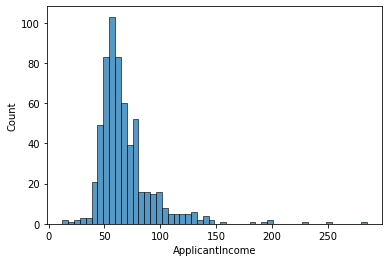

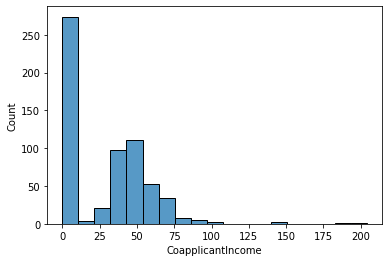

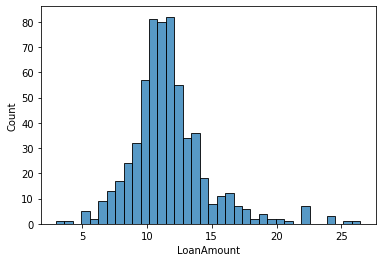

In [61]:
#Removing skewness
data['ApplicantIncome']=np.sqrt(data['ApplicantIncome'])
sns.histplot(data['ApplicantIncome'])
plt.show()
data['CoapplicantIncome']=np.sqrt(data['CoapplicantIncome'])
sns.histplot(data['CoapplicantIncome'])
plt.show()

data['LoanAmount']=np.sqrt(data['LoanAmount'])
sns.histplot(data['LoanAmount'])
plt.show()

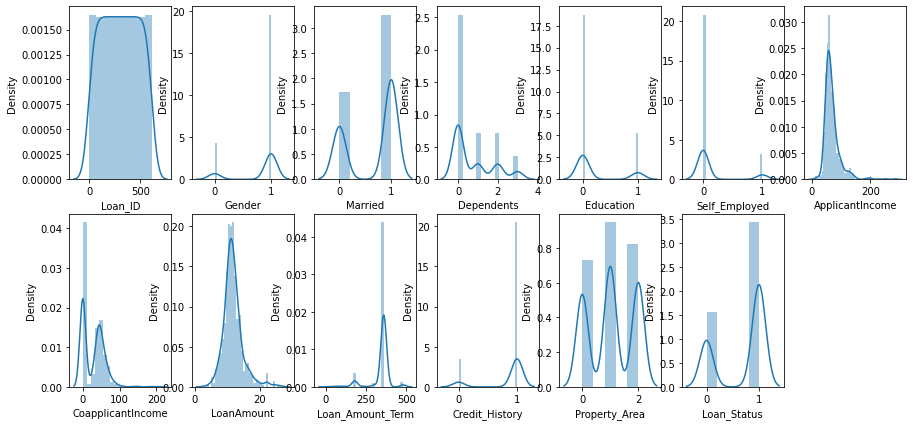

In [62]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,7), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=13 :     # as there are 13 columns in the data
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [63]:
data.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [64]:
# Now we split feature and label
x=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [65]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [66]:
from sklearn.preprocessing import StandardScaler
score =StandardScaler()
X_score = score.fit_transform(x_over)

In [68]:
#Checking for best random state which give best accuracy
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X_score,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.8346456692913385 on random state 9


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=maxRS)

In [70]:
# Logistic model for training
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x_train,y_train)

log_score =log.score(x_train,y_train)

print ('Logistic training Score ==>', log_score)

log_pred = log.predict(x_test)

log_cfm=confusion_matrix(y_test,log_pred)

log_accuracy = accuracy_score(y_test, log_pred)

print("Testing accuracy :", log_accuracy)

print(classification_report(y_test,log_pred))

log_cvs=cross_val_score(LogisticRegression(),x,y,cv=5).mean()
print("Cross_validation_score ----------",log_cvs)
log_Difference = (log_accuracy)*100 - (log_cvs)*100
print("Difference ----------",log_Difference)

Logistic training Score ==> 0.7338983050847457
Testing accuracy : 0.7795275590551181
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       121
           1       0.75      0.86      0.80       133

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254

Cross_validation_score ---------- 0.8078368652538984
Difference ---------- -2.830930619878032


In [71]:
#  SVC model for training
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)

svc_score =svc.score(x_train,y_train)

print ('SVC training Score ==>', svc_score)

svc_pred = svc.predict(x_test)

svc_cfm=confusion_matrix(y_test,svc_pred)


svc_accuracy = accuracy_score(y_test, svc_pred)


print("Testing accuracy :", svc_accuracy)


print(classification_report(y_test,svc_pred))

svc_cvs=cross_val_score(SVC(),x,y,cv=5).mean()
print("Cross_validation_score ----------",svc_cvs)
svc_Difference = (svc_accuracy)*100 - (svc_cvs)*100
print("Difference ----------",svc_Difference)

SVC training Score ==> 0.5542372881355933
Testing accuracy : 0.41732283464566927
              precision    recall  f1-score   support

           0       0.38      0.36      0.37       121
           1       0.45      0.47      0.46       133

    accuracy                           0.42       254
   macro avg       0.41      0.41      0.41       254
weighted avg       0.42      0.42      0.42       254

Cross_validation_score ---------- 0.6872984139677463
Difference ---------- -26.997557932207705


In [72]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

knn_score = knn.score(x_train,y_train)

print ('KNeighborsClassifier training Score ==>', knn_score)

# Importing test set for prediction

knn_pred = knn.predict(x_test)

knn_cfm=confusion_matrix(y_test,knn_pred)

knn_accuracy =  accuracy_score(y_test,knn_pred)


print("Testing accuracy :", knn_accuracy)


print(classification_report(y_test,knn_pred))

knn_cvs = cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",knn_cvs)
knn_Difference = (knn_accuracy)*100 - (knn_cvs)*100
print("Difference ----------",knn_Difference)

KNeighborsClassifier training Score ==> 0.7440677966101695
Testing accuracy : 0.5984251968503937
              precision    recall  f1-score   support

           0       0.56      0.75      0.64       121
           1       0.67      0.46      0.54       133

    accuracy                           0.60       254
   macro avg       0.61      0.61      0.59       254
weighted avg       0.62      0.60      0.59       254

Cross_validation_score ---------- 0.6123950419832067
Difference ---------- -1.3969845132812964


In [73]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()

abc.fit(x_train, y_train)

abc_score = (abc.score(x_train, y_train))

print('AdaBoostClassifier training Score ==>',abc_score)

# Importing test set for prediction

abc_pred = abc.predict(x_test)

abc_cfm=confusion_matrix(y_test,abc_pred)

abc_accuracy = accuracy_score(y_test,abc_pred)

print("Testing accuracy :", abc_accuracy)

print(classification_report(y_test,abc_pred))

abc_cvs = cross_val_score(AdaBoostClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",abc_cvs)
abc_Difference = (abc_accuracy)*100 - (abc_cvs)*100
print("Difference ----------",abc_Difference)

AdaBoostClassifier training Score ==> 0.8423728813559322
Testing accuracy : 0.7716535433070866
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       121
           1       0.77      0.81      0.79       133

    accuracy                           0.77       254
   macro avg       0.77      0.77      0.77       254
weighted avg       0.77      0.77      0.77       254

Cross_validation_score ---------- 0.6906970545115287
Difference ---------- 8.095648879555782


In [74]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

dt_score = (decision_tree.score(x_train, y_train))

print('Decision Tree training Score ==>',dt_score)

# Importing test set for prediction

dt_pred = decision_tree.predict(x_test)

dt_cfm=confusion_matrix(y_test,dt_pred)

dt_accuracy = accuracy_score(y_test,dt_pred)

print("Testing accuracy :", dt_accuracy)

print(classification_report(y_test,dt_pred))

dt_cvs = cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",dt_cvs)
dt_Difference = (dt_accuracy)*100 - (dt_cvs)*100
print("Difference ----------",dt_Difference)

Decision Tree training Score ==> 1.0
Testing accuracy : 0.7952755905511811
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       121
           1       0.83      0.76      0.80       133

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.80       254
weighted avg       0.80      0.80      0.80       254

Cross_validation_score ---------- 0.7002132480341198
Difference ---------- 9.506234251706147


In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc_score = (rfc.score(x_train, y_train))

print('RandomForest training Score ==>',rfc_score)

# Importing test set for prediction

rfc_pred = rfc.predict(x_test)

rfc_accuracy = accuracy_score(y_test,rfc_pred)

print("Testing accuracy :", rfc_accuracy)

rfc_cfm=confusion_matrix(y_test,dt_pred)

print(classification_report(y_test,rfc_pred))

rfc_cvs = cross_val_score(rfc,x,y,cv=5).mean()

print("Cross_validation_score ----------",rfc_cvs)

rfc_Difference = (rfc_accuracy)*100 - (rfc_cvs)*100
print("Difference ----------",rfc_Difference)

RandomForest training Score ==> 1.0
Testing accuracy : 0.8661417322834646
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       121
           1       0.85      0.90      0.88       133

    accuracy                           0.87       254
   macro avg       0.87      0.86      0.87       254
weighted avg       0.87      0.87      0.87       254

Cross_validation_score ---------- 0.7670531787285086
Difference ---------- 9.90885535549559


In [76]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train, y_train)

gnb_score = (gnb.score(x_train, y_train))

print('GaussianNB training Score ==>',gnb_score)

# Importing test set for prediction

gnb_pred = gnb.predict(x_test)

gnb_accuracy = accuracy_score(y_test,gnb_pred)


print("Testing accuracy :", gnb_accuracy)


gnb_cfm=confusion_matrix(y_test,dt_pred)

print(classification_report(y_test,gnb_pred))

gnb_cvs = cross_val_score(gnb,x,y,cv=5).mean()

print("Cross_validation_score ----------",gnb_cvs)
gnb_Difference = (gnb_accuracy)*100 - (gnb_cvs)*100
print("Difference ----------",gnb_Difference)

GaussianNB training Score ==> 0.735593220338983
Testing accuracy : 0.8070866141732284
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       121
           1       0.76      0.93      0.84       133

    accuracy                           0.81       254
   macro avg       0.83      0.80      0.80       254
weighted avg       0.82      0.81      0.80       254

Cross_validation_score ---------- 0.8013328002132478
Difference ---------- 0.5753813959980505


In [77]:
models = pd.DataFrame({'Classifier':['LogisticRegression', 'SVC', 'KNeighborsClassifier','AdaBoostClassifier','DecisionTreeClassifier', 'RandomForestClassifier','GaussianNB'],
                      'Score':[log_accuracy,svc_accuracy,knn_accuracy,abc_accuracy,dt_accuracy,rfc_accuracy,gnb_accuracy],
                       'CVS':[log_cvs,svc_cvs,knn_cvs,abc_cvs,dt_cvs,rfc_cvs,gnb_cvs],
                       'Difference':[log_Difference,svc_Difference,knn_Difference,abc_Difference,dt_Difference,rfc_Difference,gnb_Difference]
                       
})
models.sort_values(by='Score',ascending=False)

,Classifier,Score,CVS,Difference
5,RandomForestClassifier,0.866142,0.767053,9.908855
6,GaussianNB,0.807087,0.801333,0.575381
4,DecisionTreeClassifier,0.795276,0.700213,9.506234
0,LogisticRegression,0.779528,0.807837,-2.830931
3,AdaBoostClassifier,0.771654,0.690697,8.095649
2,KNeighborsClassifier,0.598425,0.612395,-1.396985
1,SVC,0.417323,0.687298,-26.997558


In [78]:
#Now we find ROC, AUC score

In [79]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve,r2_score

In [80]:
# LogisticRegression
roc_auc_score(y_test, log.predict(x_test))

0.7756788665879576

In [81]:
# SVC Classifier
roc_auc_score(y_test,svc.predict(x_test))

0.4149008885850991

In [82]:
# AdaBoostClassifier
roc_auc_score(y_test,abc.predict(x_test))

0.7696514012303486

In [83]:
# DecisionTreeClassifier
roc_auc_score(y_test,decision_tree.predict(x_test))

0.7970546200211273

In [84]:
# RandomForestClassifier
roc_auc_score(y_test,svc.predict(x_test))

0.4149008885850991

In [85]:
# GaussianNBClassifier
roc_auc_score(y_test,gnb.predict(x_test))

0.8008761573354874

In [86]:
#Let's check ROC, AUC Curve for the fitted model

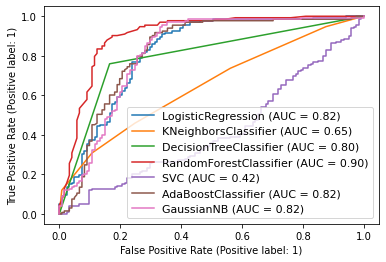

In [87]:
disp = plot_roc_curve(log, x_test, y_test)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(decision_tree, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gnb, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

In [88]:
# #we see that DecisionTreeClassifier  is best model and also give highest accuracy 77.9% and least difference between accuracy and  cross validation

In [89]:
# Hyperparameter tunning the machine Learning Model

In [90]:
grid_param = {"criterion": ["gini","entropy"],
              "max_depth": range(2,10,3),  
              "min_samples_leaf": range(1,10,2),
              "min_samples_split":range(2,10,2)} 

In [91]:
grid_Search = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = grid_param, cv = 5, n_jobs = -1)

In [92]:
grid_Search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [93]:
grid_Search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [94]:
clf= DecisionTreeClassifier(criterion = 'gini',max_depth = 2, min_samples_leaf = 1, min_samples_split = 2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [95]:
clf.score(x_train,y_train)

0.7694915254237288

In [96]:
y_predict = clf.predict(x_test)

In [97]:
accuracy_score(y_test,y_predict)

0.8031496062992126

In [98]:
#After hyperparatmeter tunning of of DecisionTreeClassifie is 79.5%

In [99]:
#Saving the model
import joblib 
joblib.dump(decision_tree,'loan_prediction')

['loan_prediction']